In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import norm

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<Axes: xlabel='age'>

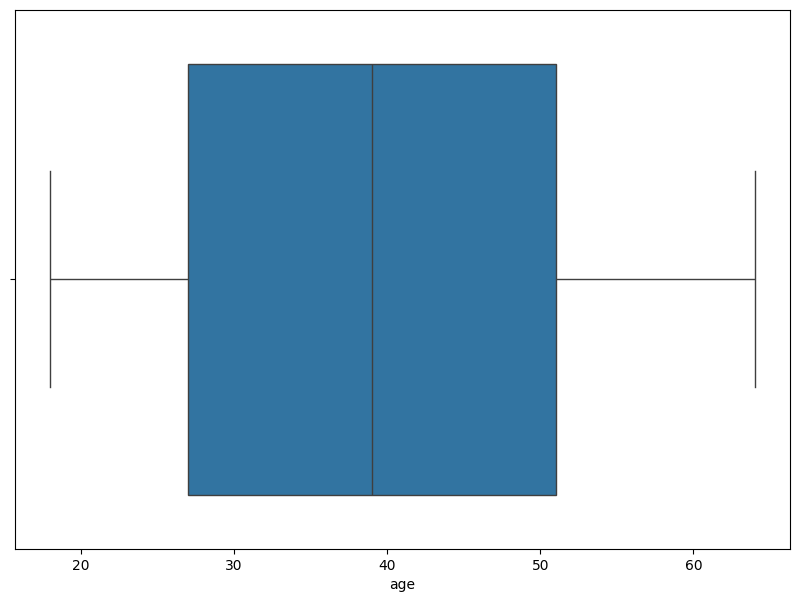

In [8]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (10, 7))

sns.boxplot(x = df["age"])
# sns.boxplot(data = df, x="age")

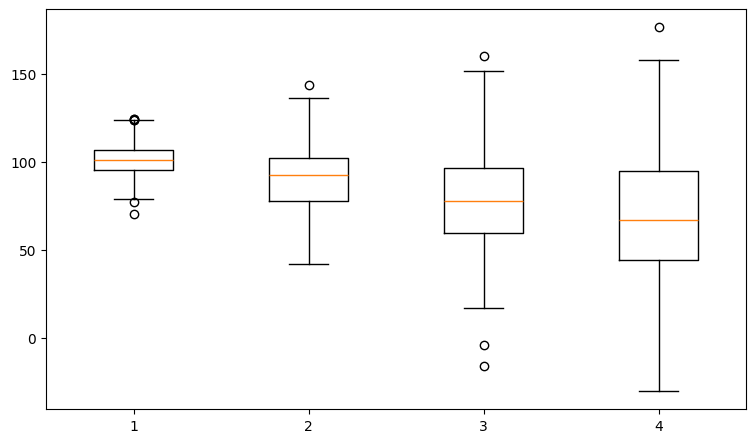

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(7, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [26]:
np.ptp(df["age"]) # გაბნევის დიაპაზონი

46

**One sample t test**

In [11]:
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

In [12]:
# pip install statsmodels

In [13]:
temperature = np.array([98.56, 98.66, 97.54, 98.71, 99.22, 99.49, 98.14, 98.84,\
                         99.28, 98.48, 98.88, 97.29, 98.88, 99.07, 98.81, 99.49,\
                         98.57, 97.98, 97.75, 97.69, 99.28, 98.52, 98.82, 98.81, 98.22]) # n=25. მოცემულია 17 წელს ქვემოთ ბავშვების ტემპერატურა     

In [14]:
print('Mean is %2.1f Sd is %2.1f' % (temperature.mean(), np.std(temperature,ddof = 1)))

Mean is 98.6 Sd is 0.6


In [15]:
# ვტესტავთ: 17 წლეს ქვემოთ ბავშვების სხეულის საშუალო ტემპერატურა მეტია 98.6 ფარენგეიტზე
# ნულოვანი: 17 წლეს ქვემოთ ბავშვების ტემპერატურის საშუალო (mean) ნაკლები  ან ტოლი 98.6 ფარენგეიტზე
# ალტერნატიული: 17 წელს ქვემოთ ბავშვების ტემპერატურის საშუალო (mean) მეტია 98.6 ფარენგეიტზე

In [16]:
t_statistic, p_value = ttest_1samp(temperature, 98.9)
print(t_statistic, p_value)

-2.507394613271926 0.019333111622388342


In [18]:
# p_value = 0.019333111622388342   <= 0.05   ----> დარეჯექთა ნულოვანი ჰიპპთეზე  ----> მივიღეთ ალტერნატიული ჰიპოთეზა
# დასკვნა:  17 წლეს ქვემოთ ბავშვების სხეულის საშუალო ტემპერატურა მეტია 98.6 ფარენგეიტზე

**Two sample T-Test**

In [20]:
# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14, 
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12]) # კლასში სიმაღლეები n=15
 
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12, 
                        19, 19, 14, 17, 22, 24, 16, 
                        13, 16, 13, 18, 15, 13]) # კლასში სიმაღლეები n=15
 
# Perform the two sample t-test with equal variances
ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257, df=38.0)

In [ ]:
# მოცემულია 2 ცალ კლასში 15-15 ბავშვის სიმაღლე.  
# ვტესტავთ: 2 სხვადასხვა კლასში სიმაღლეების საშუალო თუა ტოლი
# ნულოვანი: data_group1 და data_group2 კლასში სიმაღლეები ტოლი არაა
# ალტერნატიული: data_group1 და data_group2 კლასში სიმაღლეები ტოლია

In [27]:
# pvalue=0.5300471010405257   >0.05   შესაბამისად ნალ ჰიპოთეზას ვერ ვარეჯექთებთ, შესაბამისად 
# ვერ დავასკვნით, რომ  2 სხვადასხვა კლასში სიმაღლეების საშუალო თუა ტოლი